In [13]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = r"C:\Users\PC\Desktop\HandsOnMachineLeanring\HandsOnMachineLearning"
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Large Margin classification

In [14]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = iris["target"]

#just try to take 2 kinds of input to create 
#binary classifier
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [15]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Saving figure large_margin_classification_plot


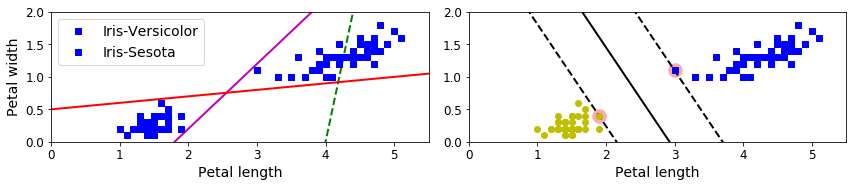

In [16]:
# Bad Models
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0  + 0.5

def plot_svc_decision_boundary(svm_clf, xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1]*x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary +margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1], s=180, facecolors= '#FFAAAA')
    plt.plot(x0,decision_boundary, "k-", linewidth = 2)
    plt.plot(x0,gutter_up,"k--",linewidth = 2)
    plt.plot(x0, gutter_down,"k--", linewidth=2)
    
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0,pred_1,"g--",linewidth=2)
plt.plot(x0,pred_2,"m-",linewidth=2)
plt.plot(x0,pred_3,"r-",linewidth=2)
plt.plot(X[:,0][y == 1], X[:,1][y == 1],"bs",label="Iris-Versicolor")
plt.plot(X[:,0][y == 0], X[:,1][y == 0],"bs",label="Iris-Sesota")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

# Sensitivity to feature scales

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [20]:
svc_clf = Pipeline((
            ("scaler" , StandardScaler()),
            ("linear_svc", LinearSVC(C = 1, loss="hinge")),
        ))

svc_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [42]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(Xs,ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

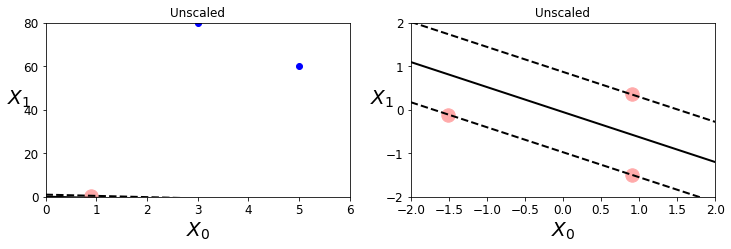

Saving figure Using Standard Scaler to improve the classification for SVM


<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize = (12,3.2))
plt.subplot(121)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], "bo")
plt.plot(Xs[:,1][ys == 0],Xs[:,0][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$X_0$", fontsize = 20)
plt.ylabel("$X_1$", fontsize = 20, rotation = False)
plt.title("Unscaled")
plt.axis([0,6,0,80])

## Try to draw after scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,ys)
plt.subplot(122)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], "bo")
plt.plot(Xs[:,1][ys == 0],Xs[:,0][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$X_0$", fontsize = 20)
plt.ylabel("$X_1$", fontsize = 20, rotation = False)
plt.title("Unscaled")
plt.axis([-2,2,-2,2])
plt.show()
save_fig("Using Standard Scaler to improve the classification for SVM")